In [ ]:
library(here)
library(Matrix)
library(tidyverse)
library(Seurat)
library(ggpointdensity)
library(scales)
library(DropletUtils)
library(reticulate)
library(repr)
#library(DoubletFinder)
library(future)
library(RColorBrewer)
library(edgeR)
library(limma)
library(GO.db)
library(org.Hs.eg.db)
#library(PCAtools)
options(future.globals.maxSize = 100000 * 1024^2)

proto_genes=read.csv("../data/bulk_data/protoplasting.csv")
proto_list=as.character(proto_genes[abs(proto_genes$logFC) > 1,]$genes)
bulk_data = read.csv("/home/robotmessenger810/data/buckets/single_cell_bucket_3_4_21/IWT_RNA_seq/scRNA_flowers/outputs/bulk_edger_10_16_20.csv")


In [1]:
YFP_dev_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_69.rds")
KE_dev_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_70.rds")

In [12]:
resolution = 1.25
set.seed(42)
options(repr.plot.width=12, repr.plot.height=12)
# Run the standard workflow for visualization and clustering
YFP_dev_seu = FindVariableFeatures(YFP_dev_seu)
YFP_dev_seu <- ScaleData(YFP_dev_seu, verbose = FALSE)
YFP_dev_seu <- RunPCA(YFP_dev_seu, npcs = 100, verbose = FALSE, approx = FALSE)
#From RunPCA doc: Features to compute PCA on. If features=NULL, PCA will be run using the variable features for the Assay. 
#Note that the features must be present in the scaled data. Any requested features that are not scaled or have 0 variance 
#will be dropped, and the PCA will be run using the remaining features.

# #previously run 20 PCs as of 2/14/22
YFP_dev_seu <- FindNeighbors(YFP_dev_seu, dims = 1:20, verbose = FALSE)
YFP_dev_seu <- FindClusters(YFP_dev_seu, resolution = resolution, algorithm = 3, verbose = FALSE)
YFP_dev_seu <- RunUMAP(YFP_dev_seu, reduction = "pca", dims = 1:20, verbose = FALSE)

[1] 1.25


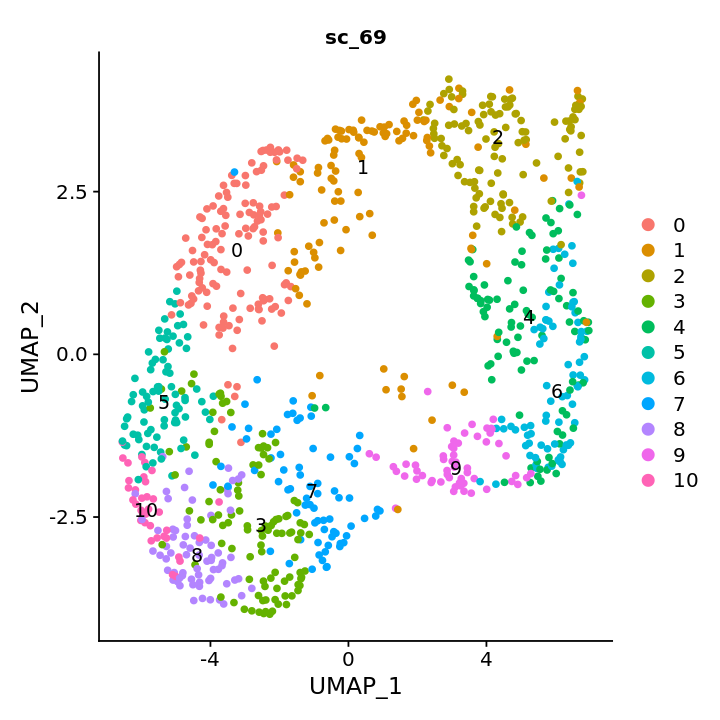

In [14]:
print(resolution)
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(YFP_dev_seu, reduction = "umap", label = TRUE, split.by = "orig.ident", pt.size = 1.5)

In [15]:
resolution = 1.25
set.seed(42)
options(repr.plot.width=12, repr.plot.height=12)
# Run the standard workflow for visualization and clustering
KE_dev_seu = FindVariableFeatures(KE_dev_seu)
KE_dev_seu <- ScaleData(KE_dev_seu, verbose = FALSE)
KE_dev_seu <- RunPCA(KE_dev_seu, npcs = 100, verbose = FALSE, approx = FALSE)
#From RunPCA doc: Features to compute PCA on. If features=NULL, PCA will be run using the variable features for the Assay. 
#Note that the features must be present in the scaled data. Any requested features that are not scaled or have 0 variance 
#will be dropped, and the PCA will be run using the remaining features.

# #previously run 20 PCs as of 2/14/22
KE_dev_seu <- FindNeighbors(KE_dev_seu, dims = 1:20, verbose = FALSE)
KE_dev_seu <- FindClusters(KE_dev_seu, resolution = resolution, algorithm = 3, verbose = FALSE)
KE_dev_seu <- RunUMAP(KE_dev_seu, reduction = "pca", dims = 1:20, verbose = FALSE)

[1] 1.25


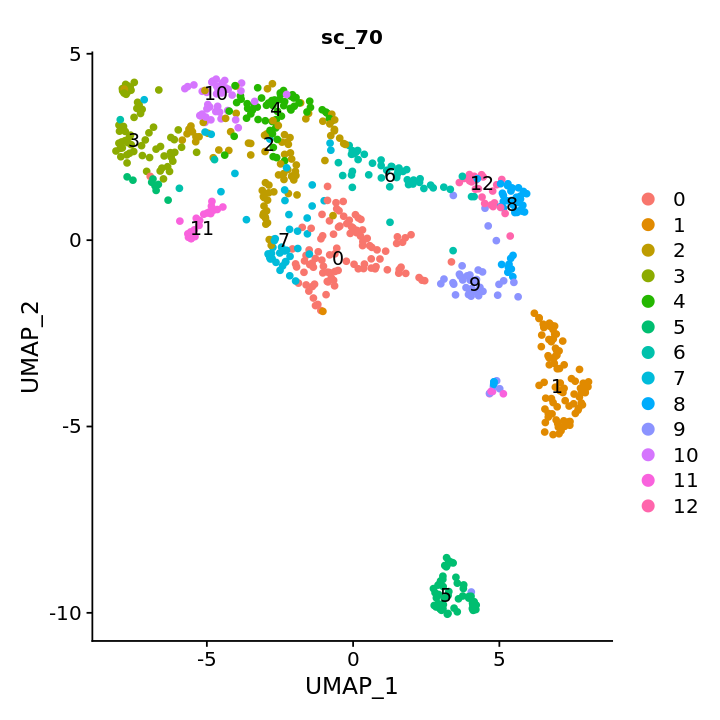

In [16]:
print(resolution)
options(repr.plot.width=6, repr.plot.height=6)
DimPlot(KE_dev_seu, reduction = "umap", label = TRUE, split.by = "orig.ident", pt.size = 1.5)